# Summary Order 2 order 1

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 5th  2022
- last update : June 5rd 2022 : Save in file

### 


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

from astropy import units as u

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
import seaborn as sns

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-06-07'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from scipy import interpolate
from scipy.signal import savgol_filter

In [12]:
from time import sleep

In [13]:
from astropy.time import Time
import astropy.units as u

# Input file

## Summary file from Auxtel Data

In [14]:
filename_auxdata = "order2order1_summary_BG40.csv" 

In [15]:
df_data = pd.read_csv(filename_auxdata,index_col=0)

In [16]:
df_data

,lambdas,ratioo2o1,ratioo2o1err
0,350.0,3.817060,0.219087
1,351.0,3.663617,0.358061
2,352.0,3.524847,0.470157
3,353.0,3.424538,0.352963
4,354.0,3.308153,0.337137
...,...,...,...
170,520.0,0.221957,0.035468
171,521.0,0.221481,0.037078
172,522.0,0.220984,0.038690
173,523.0,0.220466,0.040304


In [17]:
WL=df_data["lambdas"]

In [18]:
o2o1_data = df_data["ratioo2o1"]

In [19]:
o2o1_err = df_data["ratioo2o1err"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Measured order ratio error vs wavelength')

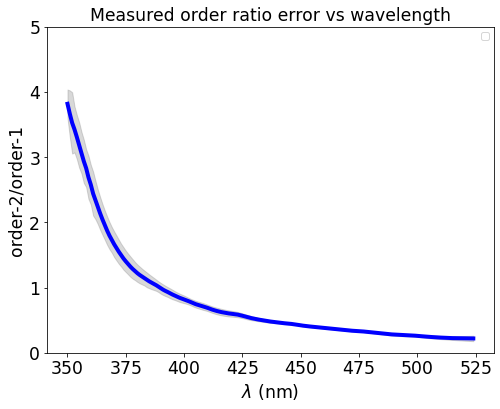

In [20]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.fill_between(WL, o2o1_data-o2o1_err  , o2o1_data + o2o1_err  ,color="gray", alpha=0.3)
ax.plot(WL,o2o1_data,'b-',lw=4)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("Measured order ratio error vs wavelength")

## Optical bench data

In [21]:
filename_obdata = "../../simulation/throughputs/20200211-holo-4-003-uniformity-datacube.npy" 

In [22]:
thearray= np.load(filename_obdata)

In [23]:
df_ob = pd.DataFrame(thearray)

In [24]:
sel_order0 = df_ob["order"] == 0
sel_order1 = df_ob["order"] == 1
sel_order2 = df_ob["order"] == 2

In [25]:
df_order0 = df_ob[sel_order0]
df_order1 = df_ob[sel_order1]
df_order2 = df_ob[sel_order2]

In [26]:
len(df_order0)

1520

In [27]:
len(df_order1)

1520

In [28]:
len(df_order2)

403

In [29]:
df_order1.dx.unique()

array([ 0.,  1.,  2.,  4., -1., -2., -4.])

In [30]:
all_df_order1 = []
for xpos in df_order1.dx.unique():
    for ypos in df_order1.dy.unique():
        dfcut = (df_order1.dx == xpos) & (df_order1.dy == ypos)
        if len(dfcut) > 0:
            x0 = df_order1[dfcut].dx.unique()
            y0 = df_order1[dfcut].dy.unique()   
            if len(x0) == 1 and len(y0) == 1:      
                all_df_order1.append(df_order1[dfcut]) 
               

In [31]:
len(all_df_order1) 

48

In [32]:
all_df_order2 = []
for xpos in df_order2.dx.unique():
    for ypos in df_order2.dy.unique():
        dfcut = (df_order2.dx == xpos) & (df_order2.dy == ypos)
        if len(dfcut) > 0:
            x0 = df_order2[dfcut].dx.unique()
            y0 = df_order2[dfcut].dy.unique()
            if len(x0) == 1 and len(y0) == 1:   
                all_df_order2.append(df_order2[dfcut]) 
               

In [33]:
len(all_df_order2) 

48

In [34]:
df_order1.head()

,order,dx,dy,wl,DE,DE_std
1520,1,0.0,0.0,400.014,0.081134,0.000425
1521,1,0.0,0.0,419.989,0.122047,0.000553
1522,1,0.0,0.0,440.023,0.284278,0.000354
1523,1,0.0,0.0,459.966,0.307857,0.000382
1524,1,0.0,0.0,479.965,0.309489,0.000384


Text(0.5, 1.0, 'diffraction efficiency')

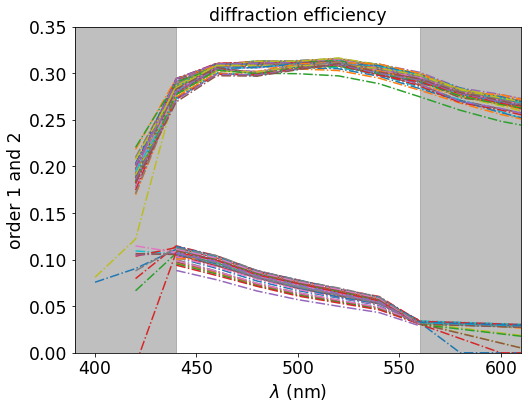

In [35]:
#sns.color_palette("hls",len(all_df_order2))
WLMIN0 = 440.
WLMAX0 = 560.

DWL = 50

WLMIN1 = WLMIN0-DWL
WLMAX1 = WLMAX0+DWL
EFFMIN = 0
EFFMAX = 0.35

rect1 = plt.Rectangle((WLMIN1,EFFMIN), DWL, EFFMAX,color="grey",alpha=0.5)
rect2 = plt.Rectangle((WLMAX0,EFFMIN), DWL, EFFMAX,color="grey",alpha=0.5)

WLGRID = np.arange(WLMIN1,WLMAX1+1)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

for df in all_df_order2:
    x0 = df.dx.unique()[0]
    y0 = df.dy.unique()[0]
    ax.plot(df.wl,df.DE,'-.')
    
for df in all_df_order1:
    x0 = df.dx.unique()[0]
    y0 = df.dy.unique()[0]
    ax.plot(df.wl,df.DE,'-.')
    
ax.add_patch(rect1) 
ax.add_patch(rect2)  
ax.set_xlim(WLMIN1,WLMAX1)
ax.set_ylim(EFFMIN,EFFMAX)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order 1 and 2")
ax.set_title("diffraction efficiency")

Text(0.5, 1.0, 'Order 2 order 1 ratio')

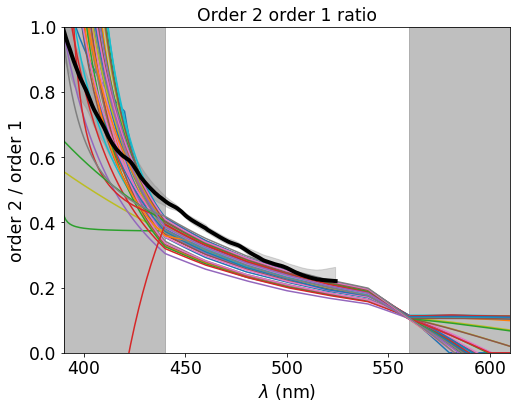

In [36]:
#sns.color_palette("hls",len(all_df_order2))

WLMIN0 = 440.
WLMAX0 = 560.

DWL = 50

WLMIN1 = WLMIN0-DWL
WLMAX1 = WLMAX0+DWL
RATIOMIN = 0.
RATIOMAX = 1.0

rect1 = plt.Rectangle((WLMIN1,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)
rect2 = plt.Rectangle((WLMAX0,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)


fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

for df2 in all_df_order2:
    x2 = df2.dx.unique()[0]
    y2 = df2.dy.unique()[0]
    wl2 = df2.wl.values
    de2 = df2.DE.values
    f2 = interpolate.interp1d(wl2,de2,bounds_error=False,fill_value="extrapolate")
    for df1 in all_df_order1:
        x1 = df1.dx.unique()[0]
        y1 = df1.dy.unique()[0]
        wl1 = df1.wl.values
        de1 = df1.DE.values
        f1 = interpolate.interp1d(wl1,de1,bounds_error=False,fill_value="extrapolate")
        if (x1 == x2) and (y1 == y2):
            ratio = f2(WLGRID)/f1(WLGRID)
            ax.plot(WLGRID,ratio)

ax.fill_between(WL, o2o1_data-o2o1_err  , o2o1_data + o2o1_err  ,color="gray", alpha=0.3)
ax.plot(WL,o2o1_data,'k-',lw=4)

ax.add_patch(rect1) 
ax.add_patch(rect2) 
ax.set_xlim(WLMIN1,WLMAX1)
ax.set_ylim(0,1)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order 2 / order 1")
ax.set_title("Order 2 order 1 ratio")

# Values from Marc

    lambda 	2/1 banc 	erreur
    4,00E+02 	9,26E-01 	4,23E-01
    4,10E+02 	7,46E-01 	2,52E-01
    4,20E+02 	8,21E-01 	1,55E-01
    4,30E+02 	4,15E-01 	2,40E-02
    4,40E+02 	3,90E-01 	5,12E-04
    4,50E+02 	3,57E-01 	1,15E-03
    4,60E+02 	3,23E-01 	1,69E-03
    4,70E+02 	2,95E-01 	8,24E-04
    4,80E+02 	2,75E-01 	1,16E-04
    4,90E+02 	2,56E-01 	6,29E-04
    5,00E+02 	2,38E-01 	1,14E-03
    5,10E+02 	2,21E-01 	1,30E-03
    5,20E+02 	2,08E-01 	1,46E-03
    5,30E+02 	1,95E-01 	1,12E-03
    5,40E+02 	1,84E-01 	7,98E-04
    5,50E+02 	1,73E-01 	6,24E-04

In [37]:
MarcdataO2O1 = np.array([
[4.00E+02 ,	9.26E-01 ,	4.23E-01],
[4.10E+02 , 7.46E-01 ,	2.52E-01],
[4.20E+02 ,	8.21E-01 ,	1.55E-01],
[4.30E+02 ,	4.15E-01 ,	2.40E-02],
[4.40E+02 ,	3.90E-01 ,	5.12E-04],
[4.50E+02 ,	3.57E-01 ,	1.15E-03],
[4.60E+02 ,	3.23E-01 ,	1.69E-03],
[4.70E+02 ,	2.95E-01 ,	8.24E-04],
[4.80E+02 ,	2.75E-01 ,	1.16E-04],
[4.90E+02 ,	2.56E-01 ,	6.29E-04],
[5.00E+02 ,	2.38E-01 ,	1.14E-03],
[5.10E+02 ,	2.21E-01 ,	1.30E-03],
[5.20E+02 ,	2.08E-01 ,	1.46E-03],
[5.30E+02 ,	1.95E-01 ,	1.12E-03],
[5.40E+02 ,	1.84E-01 ,	7.98E-04],
[5.50E+02 ,	1.73E-01 ,	6.24E-04]])

Text(0.5, 1.0, 'Order 2 order 1 ratio')

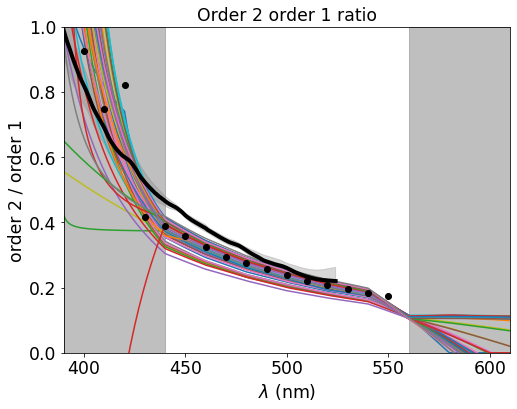

In [38]:
#sns.color_palette("hls",len(all_df_order2))

WLMIN0 = 440.
WLMAX0 = 560.

DWL = 50

WLMIN1 = WLMIN0-DWL
WLMAX1 = WLMAX0+DWL
RATIOMIN = 0.
RATIOMAX = 1.0

rect1 = plt.Rectangle((WLMIN1,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)
rect2 = plt.Rectangle((WLMAX0,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)


fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

for df2 in all_df_order2:
    x2 = df2.dx.unique()[0]
    y2 = df2.dy.unique()[0]
    wl2 = df2.wl.values
    de2 = df2.DE.values
    f2 = interpolate.interp1d(wl2,de2,bounds_error=False,fill_value="extrapolate")
    for df1 in all_df_order1:
        x1 = df1.dx.unique()[0]
        y1 = df1.dy.unique()[0]
        wl1 = df1.wl.values
        de1 = df1.DE.values
        f1 = interpolate.interp1d(wl1,de1,bounds_error=False,fill_value="extrapolate")
        if (x1 == x2) and (y1 == y2):
            ratio = f2(WLGRID)/f1(WLGRID)
            ax.plot(WLGRID,ratio)

ax.fill_between(WL, o2o1_data-o2o1_err  , o2o1_data + o2o1_err  ,color="gray", alpha=0.3)
ax.plot(WL,o2o1_data,'k-',lw=4)
ax.plot(MarcdataO2O1[:,0],MarcdataO2O1[:,1],'ko') 

ax.add_patch(rect1) 
ax.add_patch(rect2) 
ax.set_xlim(WLMIN1,WLMAX1)
ax.set_ylim(0,1)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order 2 / order 1")
ax.set_title("Order 2 order 1 ratio")

# Compare with a particular spectrum

In [39]:
path = "data_order21"

In [40]:
filelist = sorted(os.listdir(path))
filelist

['order2order1_2021110400263.csv',
 'order2order1_2021110400274.csv',
 'order2order1_2021110400508.csv',
 'order2order1_2021110400519.csv',
 'order2order1_2021110400542.csv',
 'order2order1_2021110400553.csv',
 'order2order1_2021110400564.csv']

In [41]:
N=len(filelist)

In [42]:
exposure_list = [ (filename.split(".")[0]).split("_")[-1]  for filename in filelist ]

In [43]:
Exposure_to_target = {"2021110400263":"HD905205",
                     "2021110400274":"HD009051",
                     "2021110400508":"ETADOR",
                     "2021110400519":"HD38949",
                     "2021110400542":"HD031128",
                     "2021110400553":"Mu Col",
                     "2021110400564":"HD38949"}                     

In [44]:
all_df = [  pd.read_csv(os.path.join(path,filename)) for filename in filelist]

Text(0.5, 1.0, 'Measured order ratio error vs wavelength')

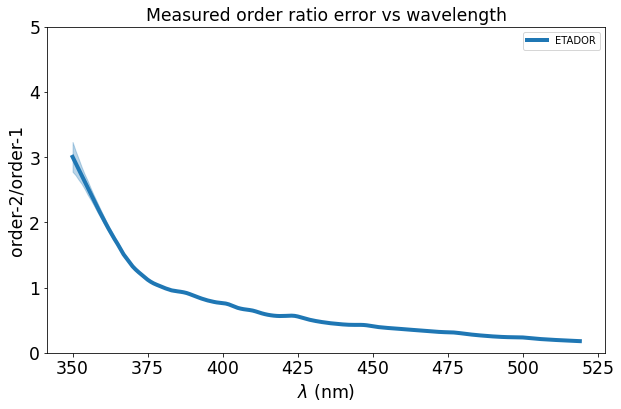

In [47]:

sns.color_palette("hls", N)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for count,df in enumerate(all_df):
    wl    = df["lambdas"] 
    ratio = df["ratioo2o1"] 
    ratioerr = df["ratioo2o1err"]
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    if target == "ETADOR":
        c=ax.plot(wl,ratio,label=target,lw=4)
        ax.fill_between(wl, ratio-ratioerr , ratio + ratioerr,color=c[0].get_color(), alpha=0.3)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order-2/order-1")
ax.legend()
ax.set_ylim(0,5.)
ax.set_title("Measured order ratio error vs wavelength")

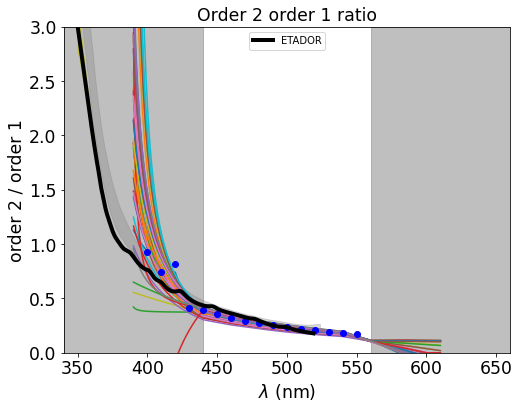

In [48]:
#sns.color_palette("hls",len(all_df_order2))

WLMIN0 = 440.
WLMAX0 = 560.

DWL = 100

WLMIN1 = WLMIN0-DWL
WLMAX1 = WLMAX0+DWL
RATIOMIN = 0.
RATIOMAX = 3.0

rect1 = plt.Rectangle((WLMIN1,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)
rect2 = plt.Rectangle((WLMAX0,RATIOMIN), DWL, RATIOMAX,color="grey",alpha=0.5)


fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)

for df2 in all_df_order2:
    x2 = df2.dx.unique()[0]
    y2 = df2.dy.unique()[0]
    wl2 = df2.wl.values
    de2 = df2.DE.values
    f2 = interpolate.interp1d(wl2,de2,bounds_error=False,fill_value="extrapolate")
    for df1 in all_df_order1:
        x1 = df1.dx.unique()[0]
        y1 = df1.dy.unique()[0]
        wl1 = df1.wl.values
        de1 = df1.DE.values
        f1 = interpolate.interp1d(wl1,de1,bounds_error=False,fill_value="extrapolate")
        if (x1 == x2) and (y1 == y2):
            ratio = f2(WLGRID)/f1(WLGRID)
            ax.plot(WLGRID,ratio)

ax.fill_between(WL, o2o1_data-o2o1_err  , o2o1_data + o2o1_err  ,color="gray", alpha=0.3)
#ax.plot(WL,o2o1_data,'k-',lw=4)
ax.plot(MarcdataO2O1[:,0],MarcdataO2O1[:,1],'bo') 

for count,df in enumerate(all_df):
    wl    = df["lambdas"] 
    ratio = df["ratioo2o1"] 
    ratioerr = df["ratioo2o1err"]
    exposure = exposure_list[count]
    target   = Exposure_to_target[exposure] 
    if target == "ETADOR":
        c=ax.plot(wl,ratio,label=target,lw=4,color="k")
        #ax.fill_between(wl, ratio-ratioerr , ratio + ratioerr,color=c[0].get_color(), alpha=0.8)
        ax.fill_between(wl, ratio-ratioerr , ratio + ratioerr,color="yellow", alpha=1)
        
ax.add_patch(rect1) 
ax.add_patch(rect2) 
ax.set_xlim(WLMIN1,WLMAX1)
ax.set_ylim(0,3)
ax.set_xlabel("$\\lambda$ (nm)")
ax.set_ylabel("order 2 / order 1")
ax.set_title("Order 2 order 1 ratio")
ax.legend()